In [1]:
import numpy as np
import sympy as sp
from General import functies as functies
from General import classes as classes
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline

In [76]:
#de exacte oplossing van die fucking derdegraadsveelterm die [H+] beschrijft
H, Ka, Na, c0 = sp.symbols('H Ka Na c0')
Kw = 10**(-7) #de waterconstante
vergelijking = sp.Eq(H**3 + Ka*H**2 + (Na-Kw*c0)*H + Ka*(Na - Kw), 0)
display(vergelijking)
oplossing = sp.solve(vergelijking, H)
for opl in oplossing:
    display(opl.subs(Ka, 4.74).subs(Na, 0).subs(c0, 1).evalf())
    #skip dat imaginair deel, uit de 

Eq(H**3 + H**2*Ka + H*(Na - 1.0e-7*c0) + Ka*(Na - 1.0e-7), 0)

-4.74 + 4.463e-20*I

0.00031622776565533 + 7.190136e-16*I

-0.000316227765654919 - 7.191095e-16*I

In [56]:
def pH_buffer(pKa, ca, cb):
    return pKa - np.log10(ca/cb)

def nieuw_mengsel(ca, cb, deltaca, deltacb):
    canieuw = ca+deltaca-deltacb
    cbnieuw = cb-deltaca+deltacb
    return canieuw, cbnieuw

def pH_experiment(VNaOH, parameters):
    begin_n = parameters[0]
    NaOH = VNaOH * 0.1 #Molair
    return pH_buffer(4.74, (begin_n - NaOH)/(40e-3 + VNaOH), NaOH/(40e-3 + VNaOH))

C:\Users\User\AppData\Local\Temp\ipykernel_27520\1402819856.py:2: RuntimeWarning: divide by zero encountered in divide
  return pKa - np.log10(ca/cb)
C:\Users\User\AppData\Local\Temp\ipykernel_27520\1402819856.py:2: RuntimeWarning: divide by zero encountered in log10
  return pKa - np.log10(ca/cb)


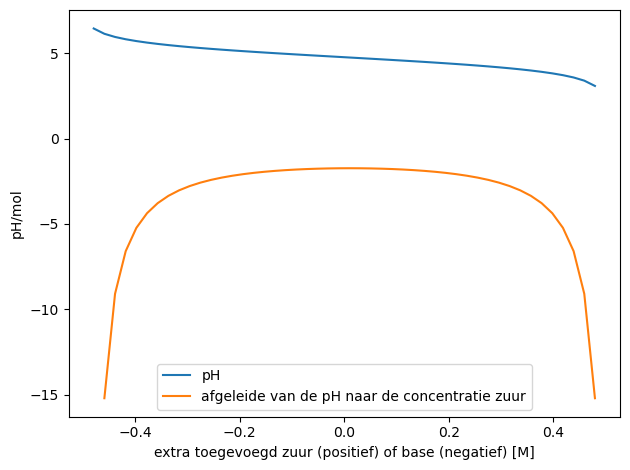

minimum van de afgeleide:
x =  0.0  dy/dx =  -1.7374191621223358


In [3]:
#voorbereidende oefening
cabegin = 0.5 #alles in molair doen
cbbegin = 0.5
pKa = 4.76
extrazuur = np.linspace(-0.5,0.5) #negatief toegevoegd zuur = toegevoegd base
fig, ax = plt.subplots(1,1)
ax.plot(extrazuur, pH_buffer(pKa, *nieuw_mengsel(cabegin, cbbegin, extrazuur, 0)), label = 'pH')
D1 = pH_buffer(pKa, *nieuw_mengsel(cabegin, cbbegin, extrazuur[:-1], 0))
D2 = pH_buffer(pKa, *nieuw_mengsel(cabegin, cbbegin, extrazuur[1:], 0))
afgeleide = (D2-D1)/(extrazuur[1]-extrazuur[0])
ax.plot(extrazuur[1:], afgeleide, label = 'afgeleide van de pH naar de concentratie zuur')
ax.set_xlabel('extra toegevoegd zuur (positief) of base (negatief) [M]')
ax.set_ylabel('pH/mol')
ax.legend()
plt.tight_layout()
plt.show()
print('minimum van de afgeleide:')
print('x = ',(extrazuur[np.argmax(afgeleide)] + extrazuur[1+np.argmax(afgeleide)])/2, ' dy/dx = ', np.max(afgeleide))
#het is duidelijk minimaal rond 0

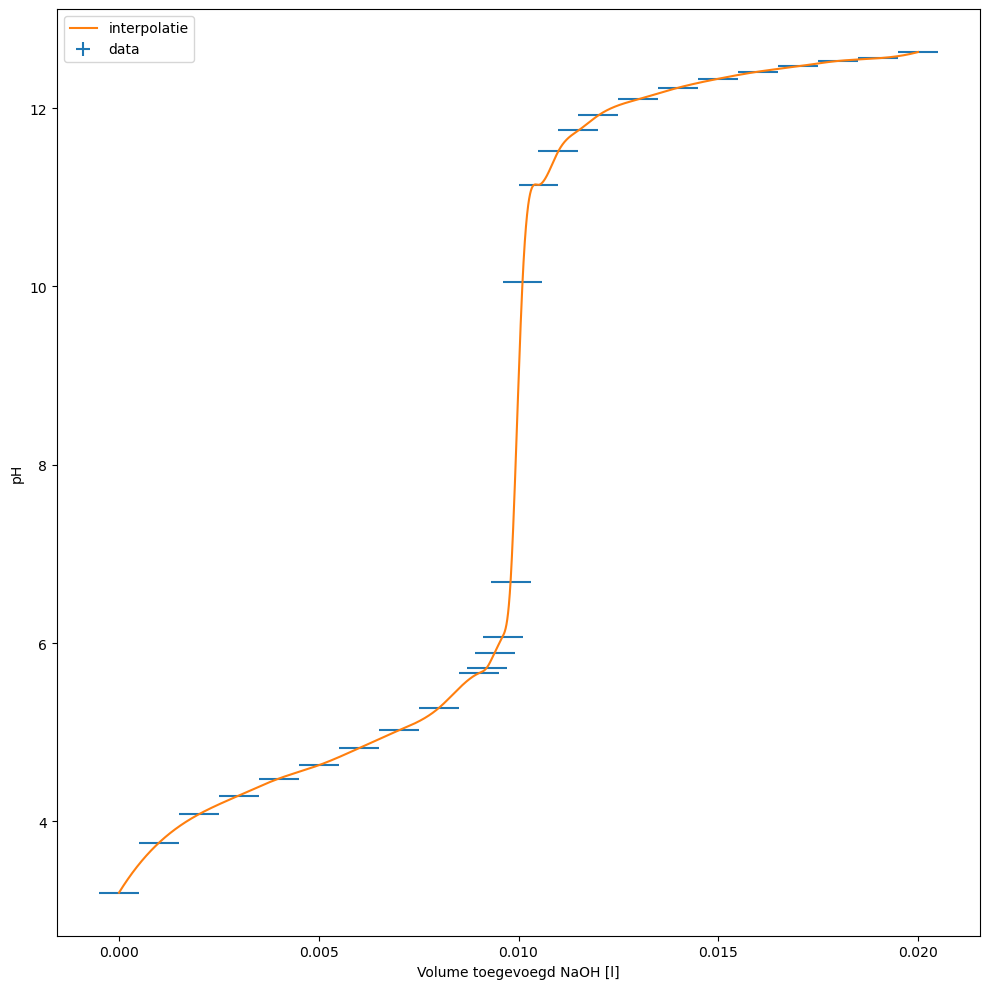

In [65]:
#de plot van de data en zo
adres = 'buffer/titratie2.txt'
volumes,pHs = np.loadtxt(adres, delimiter=",").T #volumes in ml
volumes *= 10**(-3) #vanaf nu volumes in l
volumelinspace = np.linspace(0,20e-3,5000)
pHfunctie = CubicSpline(volumes, pHs)
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.errorbar(volumes, pHs, xerr = 0.5e-3, yerr = 0.01, linestyle = '', label = 'data')
ax.plot(volumelinspace, pHfunctie(volumelinspace), label = 'interpolatie')
ax.set_ylabel('pH')
ax.set_xlabel('Volume toegevoegd NaOH [l]')
ax.legend()
plt.tight_layout()
plt.show()

[0.001]
[0.001  0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
 0.0092]
<function find_sigma_values_2D.<locals>.<lambda> at 0x000001A3983976A0>
[[0.0009000000000000001, 0.001]]
n_0 heeft als waarde: 0.001 + 0 - 0.0001 met 68% betrouwbaarheidsinterval: [0.0009, 0.001] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: nan
De gereduceerde chi^2 waarde is: nan


C:\Users\User\AppData\Local\Temp\ipykernel_27520\4110681442.py:2: RuntimeWarning: invalid value encountered in log10
  return pKa - np.log10(ca/cb)


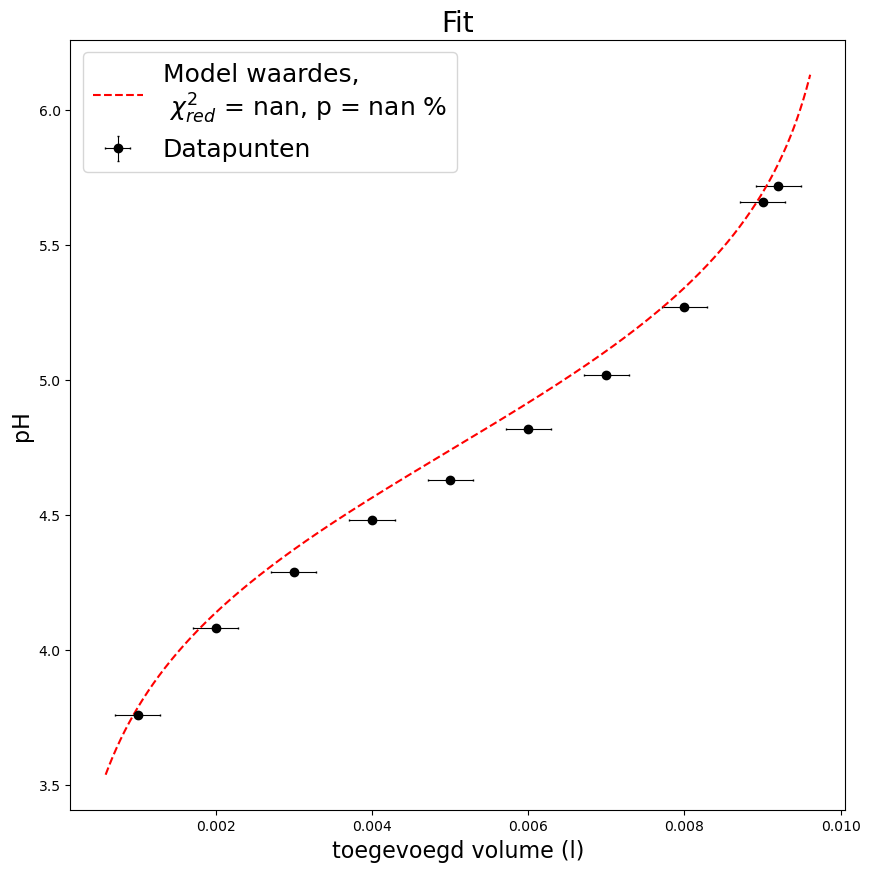

[[0.001, (9.999999999999994e-05, 0.0), 'S']]

In [63]:
#fit het buffergebied binnen pKa - 1 tot pKa + 1
indxmin = 0
while pHs[indxmin] < 3.74:
    indxmin+=1
indxmax = indxmin+1
while pHs[indxmax] < 5.74:
    indxmax += 1
volumesreduced = volumes[indxmin: indxmax]
pHsreduced = pHs[indxmin: indxmax]
def invals(x,y):
    return [0.001]
functies.fit_2D(['n_0'], pH_experiment, invals, volumesreduced, pHsreduced, np.full(np.shape(volumesreduced),1e-3)**2/12, np.full(np.shape(pHsreduced),0.01)**2/12, grootteorde = 1e-3, x_as_titel= 'toegevoegd volume (l)', y_as_titel = 'pH', bounds=[(0,5)], detailed_logs=False)